# 从sklearn导入线性回归模型

In [1]:
from sklearn import linear_model

In [2]:
reg = linear_model.LinearRegression()

In [3]:
train_data = [1,2,3,4,5,6,7,8,8]

In [8]:
train_target = []

# 根据输入的训练数据生成测试结果

In [9]:
for i in train_data:
    train_target.append(i*0.3)
    

In [10]:
train_target

[0.3, 0.6, 0.8999999999999999, 1.2, 1.5, 1.7999999999999998, 2.1, 2.4, 2.4]

直接喂sklearn模型 list 类型的数据会报错“Found arrays with inconsistent numbers of samples ”，查了一些资料，要转换为 numpy.array, 并转换为矩阵形式

In [11]:
reg.fit(train_data, train_target)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 9]

In [12]:
import numpy as np

In [16]:
train_data = np.array(train_data)

In [17]:
train_data

array([1, 2, 3, 4, 5, 6, 7, 8, 8])

In [19]:
train_data.shape

(9,)

In [20]:
train_target = np.array(train_target)

In [22]:
train_target

array([0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.4])

In [23]:
train_target.shape

(9,)

行向量还是会报错， 需要转换为列向量

In [24]:
reg.fit(train_data, train_target)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 9]

In [25]:
train_data.reshape(9,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [8]])

In [26]:
train_target.reshape(9,1)

array([[0.3],
       [0.6],
       [0.9],
       [1.2],
       [1.5],
       [1.8],
       [2.1],
       [2.4],
       [2.4]])

ndarray 的 reshape 操作不会导致原地转换的， 只会打回一个 View， 需要赋值才能完成转换

In [27]:
reg.fit(train_data, train_target)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 9]

下面要导入的 validation 就是校验两个向量报错的地方， 我尝试将其单独导入做测试

In [30]:
from sklearn.utils import validation

In [33]:
validation.check_consistent_length(train_data, train_target)

In [35]:
validation._num_samples(train_data)

9

In [36]:
validation._num_samples(train_target)

9

In [37]:
train_data = train_data.reshape(9, 1)

In [38]:
train_data

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [8]])

In [39]:
train_target = train_target.reshape(9, 1)

In [40]:
train_target

array([[0.3],
       [0.6],
       [0.9],
       [1.2],
       [1.5],
       [1.8],
       [2.1],
       [2.4],
       [2.4]])

将行向量转换为列向量后，喂数成功

In [41]:
reg.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

训练结果与预期一致

In [43]:
reg.coef_

array([[0.3]])

进行预测, 成功

In [53]:
predict_target = reg.predict(train_data)

# 总结 1

sklearn的模型喂数训练时注意要用矩阵，直接喂行向量或列表会报长度不一致错误。

# 绘图

In [46]:
import matplotlib.pyplot as plt

In [49]:
plt.scatter(train_data, train_target, color='black')

In [54]:
plt.plot(train_data, predict_target, color='red', linewidth=3)

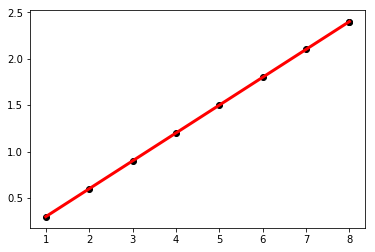

In [55]:
plt.show()